<a href="https://colab.research.google.com/github/kithevans/Jin/blob/master/ked_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import math
import missingno as msno
from pandas import ExcelWriter 
from google.colab import drive
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
!pip install --upgrade --pre tensorflow --quiet
drive.mount('/gdrive')

!pip install livelossplot --quiet
from livelossplot import PlotLosses

!pip install shap --quiet
import shap

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 516.2MB 29kB/s 
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
     |████████████████████████████████| 276kB 2.8MB/s 


In [2]:
print(tf.__version__)

2.2.0-rc4


In [0]:
# trn1= pd.read_excel('/gdrive/My Drive/KED/sample/KED581217.xlsx', index_col=0)
# trn1.to_csv ('/gdrive/My Drive/KED/sample/KED581217.csv', index = True, header=True)
trn1= pd.read_csv('/gdrive/My Drive/KED/sample/KED581217.csv', index_col=0)

In [0]:
# trn2= pd.read_excel('/gdrive/My Drive/KED/sample/KED02.xls', index_col=0)
# trn2.to_csv ('/gdrive/My Drive/KED/sample/KED02_test.csv', index = True, header=True)

In [0]:
trn4=pd.read_csv('/gdrive/My Drive/KED/sample/KED02_test.csv', index_col=0)

##종사자정보

In [0]:
trn_emp= pd.read_csv('/gdrive/My Drive/KED/sample/KED16H.csv', index_col=0)

In [0]:
trn_emp=trn_emp.reset_index()

In [0]:
trn_emp=trn_emp[['V1','V2','V6']]
trn_emp=trn_emp.rename(columns={'V1':'KEDCode','V2':'FY_Emp','V6':'Emp'})

In [0]:
trn_emp_edited=trn_emp.loc[(trn_emp['FY_Emp']>=20170101)&(trn_emp['FY_Emp']<20180101)]
trn_emp_edited['FY_Emp'].unique()
trn_emp_edited=trn_emp_edited[trn_emp_edited['Emp']!=0]

In [10]:
trn_emp_edited[trn_emp_edited['KEDCode'].duplicated(keep='first')]

,KEDCode,FY_Emp,Emp
2869,1031885,20171121,2
3427,84346,20170105,101
3911,929095,20170725,521
3981,7603774,20171130,9
4604,7574596,20170727,6
...,...,...,...
538516,71579,20171106,20
538555,165876,20171206,7
538613,569544,20170928,1
538794,2358667,20171106,4


In [0]:
trn_emp_edited=trn_emp_edited.drop_duplicates(['KEDCode'],keep='first')

In [0]:
# trn2_edited=trn2_edited[['KEDCode','Emp']]

##매출액 정보

In [0]:
trn_rev= pd.read_csv('/gdrive/My Drive/KED/sample/KED03.csv', index_col=0)

In [0]:
trn_rev=trn_rev.reset_index()
trn_rev=trn_rev[trn_rev['V2']==20171231]
trn_rev=trn_rev[['V1','V2','V7','V8']]
trn_rev=trn_rev.rename(columns={'V1':'KEDCode','V2':'FY_Rev','V7':'O_Profit','V8':'N_Income'})

In [0]:
trn_rev=trn_rev.loc[(trn_rev['N_Income']>0)&(trn_rev['O_Profit']>0)]

In [16]:
trn_rev[trn_rev['O_Profit']<0]

,KEDCode,FY_Rev,O_Profit,N_Income


In [17]:
trn_rev.duplicated(['KEDCode'],keep='first')

2         False
4         False
6         False
7         False
9         False
          ...  
557033    False
557036    False
557040    False
557043    False
557044    False
Length: 276789, dtype: bool

##2005 재무data

In [18]:
trn2

NameError: ignored

In [0]:
remain_ratio=0.50
trn2_edited=trn2.dropna(axis=1,how='all',thresh=len(trn1)*remain_ratio).dropna(axis=0,how='any')

In [0]:
trn2_edited

In [0]:
trn2_edited.columns

In [0]:
test1['FY']

##2017 재무data

In [19]:
trn1

,FY,X7001110000,X7001110100,X7001110200,X7001110300,X7001113400,X7001113900,X7001116900,X7001117200,X7001117800,X7001118100,X7001120500,X7001120700,X7001120800,X7001121000,X7001122000,X7001122200,X7001125400,X7001125600,X7001128200,X7001129700,X7001129800,X7001134000,X7001134100,X7001135100,X7001135900,X7001137600,X7001140900,X7001141300,X7001141400,X7001144500,X7001144700,X7001146000,X7001150000,X7001150100,X7001150200,X7001150400,X7001150700,X7001150900,X7001151200,...,X7001631020,X7001631100,X7001640000,X7001640100,X7001640200,X7001640300,X7001640310,X7001640320,X7001640400,X7001640500,X7001640510,X7001640520,X7001640530,X7001640540,X7001640600,X7001640700,X7001640710,X7001640720,X7001640800,X7001650000,X7001650100,X7001650200,X7001650300,X7001650400,X7001650500,X7001650600,X7001650610,X7001650700,X7001650800,X7001650900,X7001651000,X7001651100,X7001651110,X7001651200,X7001651300,X7001651400,X7001651500,X7001651800,X7001670000,X7001680000
KEDCode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,20171231,2.282087e+10,3.475719e+09,2.980879e+09,1.687990e+09,NaN,NaN,25557443.0,NaN,27172304.0,NaN,NaN,NaN,NaN,1.635261e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,389000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,389000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,20171231,2.529609e+07,2.191100e+07,1.840978e+07,4.967856e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.967856e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1146050.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1146050.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,20171231,4.320229e+06,3.598151e+06,1.611829e+06,1.015920e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.015920e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,20171231,1.022246e+07,1.544209e+06,1.503710e+06,8.681000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.681000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,20171231,3.390329e+06,2.865002e+06,2.594095e+06,3.390620e+05,NaN,NaN,1220.0,NaN,NaN,NaN,337842.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,194050.0,NaN,NaN,NaN,194050.0,NaN,NaN,NaN,NaN,NaN,132994.0,NaN,NaN,NaN,NaN,132994.0,10082.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9040124484,20171231,2.083220e+05,1.858360e+05,1.858360e+05,1.858360e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.858360e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9040125331,20171231,4.171300e+04,4.171300e+04,4.171300e+04,4.171300e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.171300e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [20]:
trn1['X7001210000'].isna().sum()

348348

In [21]:
remain_ratio=0.63
trn1_edited=trn1.dropna(axis=1,how='all',thresh=len(trn1)*remain_ratio).dropna(axis=0,how='any')
trn1_edited

,FY,X7001110000,X7001110100,X7001110200,X7001110300,X7001152500,X7001160300,X7001111000,X7001121800,X7001127200,X7001131200,X7001132400,X7001140600,X7001143300,X7001144445,X7001144450,X7001144455,X7001144465,X7001145100,X7001145910,X7001165100,X7001165200,X7001165300,X7001171400,X7001173410,X7001173430,X7001174000,X7001176700,X7001220500,X7001220600,X7001220700,X7001220900,X7001221600,X7001222200,X7001222300,X7001222400,X7001222700,X7001222900,X7001223160,X7001223170,X7001223310,X7001223800,X7001225310,X7001227300,X7001228150,X7001228155,X7001228160,X7001243900,X7001244000,X7001244100,X7001254500,X7001254700,X7001255000,X7001255800,X7001311600,X7001331830
KEDCode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,20171231,2.282087e+10,3.475719e+09,2.980879e+09,1.687990e+09,534801394.0,534801394.0,71124268.0,1.934515e+10,1.313374e+10,5214094.0,3.307896e+09,1.575198e+09,969225189.0,1.030888e+10,6.146883e+09,1.649516e+09,1.649516e+09,1.073444e+09,356109350.0,1.251199e+10,140610235.0,140610235.0,1.130945e+10,317567003.0,369637682.0,1.057182e+10,5.253991e+09,5.317829e+09,4.827678e+09,964543536.0,964543536.0,178577566.0,18934506.0,10316575.0,52932803.0,145543909.0,772997846.0,1737820.0,10760656.0,549903344.0,1036280.0,522673703.0,1455020.0,490150641.0,2.135073e+09,57001531.0,105128486.0,2.115604e+09,115886951.0,509619602.0,369637682.0,369637682.0,317567003.0,369637683.0,26812277.0
7,20171231,2.529609e+07,2.191100e+07,1.840978e+07,4.967856e+06,11866237.0,8439811.0,127120.0,3.385090e+06,2.332205e+06,405788.0,6.159970e+05,4.241640e+05,424164.0,1.503562e+07,1.450768e+07,2.242202e+06,2.242202e+06,3.420965e+06,202889.0,1.026047e+07,400390.0,400390.0,8.316638e+06,7157706.0,3680728.0,3.347734e+07,2.377640e+07,9.700935e+06,5.364798e+06,2435645.0,2025686.0,424777.0,199292.0,32073.0,15330.0,3902.0,190214.0,32663.0,196492.0,700649.0,8188.0,41672.0,90519.0,4336137.0,4.664090e+05,23699.0,199048.0,6.779660e+05,68137.0,4124580.0,3680728.0,3680728.0,7157706.0,3680728.0,7157706.0
18,20171231,3.390329e+06,2.865002e+06,2.594095e+06,3.390620e+05,1036718.0,1036718.0,110017.0,5.253270e+05,2.997640e+05,147643.0,1.941360e+05,2.006460e+05,200646.0,1.884627e+06,1.884627e+06,4.995300e+04,4.995300e+04,1.488540e+05,55913.0,1.505702e+06,1150000.0,1150000.0,3.557020e+05,355702.0,161715.0,5.273657e+06,4.440282e+06,8.333750e+05,7.750550e+05,262504.0,120472.0,36236.0,18034.0,2296.0,8085.0,14030.0,29995.0,12301.0,6655.0,42583.0,95.0,20938.0,11262.0,58320.0,1.661660e+05,414.0,62680.0,5.829700e+04,47132.0,166189.0,161715.0,161715.0,355702.0,161715.0,355702.0
30,20171231,1.453431e+09,3.066582e+08,2.015239e+08,1.477858e+07,122380600.0,122380600.0,27514602.0,1.146772e+09,4.631504e+08,620002.0,1.654102e+07,3.992641e+07,662781.0,8.059835e+08,3.886700e+08,6.705268e+07,6.705268e+07,2.478117e+07,1252344.0,6.474470e+08,16816000.0,16816000.0,5.978847e+08,64233485.0,63217837.0,9.173571e+08,7.961893e+08,1.211678e+08,3.871745e+07,15725142.0,15725142.0,1642309.0,900891.0,247085.0,848807.0,1622254.0,735356.0,349680.0,376439.0,6438543.0,41589.0,715155.0,334241.0,82450320.0,3.320342e+07,4841640.0,1124467.0,3.395887e+07,15165354.0,81694871.0,63217837.0,63217837.0,64233485.0,63217837.0,280685.0
31,20171231,1.575824e+09,3.181475e+08,2.554261e+08,2.706091e+07,229843710.0,229843710.0,3939662.0,1.257676e+09,4.523651e+08,2568761.0,7.749098e+07,5.909219e+06,4275274.0,6.931837e+08,3.164783e+08,1.053900e+08,1.053900e+08,1.600214e+07,798779.0,8.826399e+08,5189200.0,5189200.0,3.583914e+08,318200157.0,28063937.0,9.441862e+08,8.593878e+08,8.479834e+07,8.109259e+07,19379153.0,19379153.0,4339671.0,1133879.0,681808.0,218046.0,1714004.0,1024888.0,750485.0,862601.0,10276256.0,55307.0,1821313.0,760963.0,3705748.0,7.162209e+07,530958.0,2064273.0,3.330429e+07,7768788.0,42023549.0,28063937.0,28063937.0,318200157.0,28063937.0,318200157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [0]:
trn1_edited=trn1_edited.reset_index()

In [0]:
# trn1_edited[trn1_edited['KEDCode'].duplicated()]

In [0]:
# trn1_edited.loc[trn1_edited['KEDCode']==49872]

In [25]:
trn1_edited['FY'].unique()

array([20171231, 20170331, 20171031, 20170630, 20170930, 20170430,
       20170228, 20170131, 20170531, 20170831, 20170731, 20171130])

In [0]:
trn1_edited=trn1_edited[trn1_edited['FY']==20171231]

##Merge 작업

In [27]:
trn_mg=pd.merge(trn1_edited,trn_emp_edited,how='inner',on='KEDCode')
trn_mg=pd.merge(trn_mg, trn_rev, how='inner', on='KEDCode')
trn_mg['labor_Prod_N']=trn_mg['N_Income']/trn_mg['Emp']
trn_mg['labor_Prod_O']=trn_mg['O_Profit']/trn_mg['Emp']
trn_mg

,KEDCode,FY,X7001110000,X7001110100,X7001110200,X7001110300,X7001152500,X7001160300,X7001111000,X7001121800,X7001127200,X7001131200,X7001132400,X7001140600,X7001143300,X7001144445,X7001144450,X7001144455,X7001144465,X7001145100,X7001145910,X7001165100,X7001165200,X7001165300,X7001171400,X7001173410,X7001173430,X7001174000,X7001176700,X7001220500,X7001220600,X7001220700,X7001220900,X7001221600,X7001222200,X7001222300,X7001222400,X7001222700,X7001222900,X7001223160,X7001223170,X7001223310,X7001223800,X7001225310,X7001227300,X7001228150,X7001228155,X7001228160,X7001243900,X7001244000,X7001244100,X7001254500,X7001254700,X7001255000,X7001255800,X7001311600,X7001331830,FY_Emp,Emp,FY_Rev,O_Profit,N_Income,labor_Prod_N,labor_Prod_O
0,6,20171231,2.282087e+10,3.475719e+09,2.980879e+09,1.687990e+09,534801394.0,534801394.0,71124268.0,1.934515e+10,1.313374e+10,5214094.0,3.307896e+09,1.575198e+09,969225189.0,1.030888e+10,6.146883e+09,1.649516e+09,1.649516e+09,1.073444e+09,356109350.0,1.251199e+10,140610235.0,140610235.0,1.130945e+10,317567003.0,369637682.0,1.057182e+10,5.253991e+09,5.317829e+09,4.827678e+09,964543536.0,964543536.0,178577566.0,18934506.0,10316575.0,52932803.0,145543909.0,772997846.0,1737820.0,10760656.0,549903344.0,1036280.0,522673703.0,1455020.0,490150641.0,2.135073e+09,57001531.0,105128486.0,2.115604e+09,115886951.0,509619602.0,369637682.0,369637682.0,317567003.0,369637683.0,26812277.0,20171231,25992,20171231,490150641,369637682,14221.209680,18857.750115
1,7,20171231,2.529609e+07,2.191100e+07,1.840978e+07,4.967856e+06,11866237.0,8439811.0,127120.0,3.385090e+06,2.332205e+06,405788.0,6.159970e+05,4.241640e+05,424164.0,1.503562e+07,1.450768e+07,2.242202e+06,2.242202e+06,3.420965e+06,202889.0,1.026047e+07,400390.0,400390.0,8.316638e+06,7157706.0,3680728.0,3.347734e+07,2.377640e+07,9.700935e+06,5.364798e+06,2435645.0,2025686.0,424777.0,199292.0,32073.0,15330.0,3902.0,190214.0,32663.0,196492.0,700649.0,8188.0,41672.0,90519.0,4336137.0,4.664090e+05,23699.0,199048.0,6.779660e+05,68137.0,4124580.0,3680728.0,3680728.0,7157706.0,3680728.0,7157706.0,20170412,63,20171231,4336137,3680728,58424.253968,68827.571429
2,18,20171231,3.390329e+06,2.865002e+06,2.594095e+06,3.390620e+05,1036718.0,1036718.0,110017.0,5.253270e+05,2.997640e+05,147643.0,1.941360e+05,2.006460e+05,200646.0,1.884627e+06,1.884627e+06,4.995300e+04,4.995300e+04,1.488540e+05,55913.0,1.505702e+06,1150000.0,1150000.0,3.557020e+05,355702.0,161715.0,5.273657e+06,4.440282e+06,8.333750e+05,7.750550e+05,262504.0,120472.0,36236.0,18034.0,2296.0,8085.0,14030.0,29995.0,12301.0,6655.0,42583.0,95.0,20938.0,11262.0,58320.0,1.661660e+05,414.0,62680.0,5.829700e+04,47132.0,166189.0,161715.0,161715.0,355702.0,161715.0,355702.0,20170516,34,20171231,58320,161715,4756.323529,1715.294118
3,30,20171231,1.453431e+09,3.066582e+08,2.015239e+08,1.477858e+07,122380600.0,122380600.0,27514602.0,1.146772e+09,4.631504e+08,620002.0,1.654102e+07,3.992641e+07,662781.0,8.059835e+08,3.886700e+08,6.705268e+07,6.705268e+07,2.478117e+07,1252344.0,6.474470e+08,16816000.0,16816000.0,5.978847e+08,64233485.0,63217837.0,9.173571e+08,7.961893e+08,1.211678e+08,3.871745e+07,15725142.0,15725142.0,1642309.0,900891.0,247085.0,848807.0,1622254.0,735356.0,349680.0,376439.0,6438543.0,41589.0,715155.0,334241.0,82450320.0,3.320342e+07,4841640.0,1124467.0,3.395887e+07,15165354.0,81694871.0,63217837.0,63217837.0,64233485.0,63217837.0,280685.0,20171231,797,20171231,82450320,63217837,79319.745295,103450.840652
4,31,20171231,1.575824e+09,3.181475e+08,2.554261e+08,2.706091e+07,229843710.0,229843710.0,3939662.0,1.257676e+09,4.523651e+08,2568761.0,7.749098e+07,5.909219e+06,4275274.0,6.931837e+08,3.164783e+08,1.053900e+08,1.053900e+08,1.600214e+07,798779.0,8.826399e+08,5189200.0,5189200.0,3.583914e+08,318200157.0,28063937.0,9.441862e+08,8.593878e+08,8.479834e+07,8.109259e+07,19379153.0,19379153.0,4339671.0,1133879.0,681808.0,218046.0,1714004.0,1024888.0,750485.0,862601.0,10276256.0,55307.0,1821313.0,760963.0,3705748.0,7.162209e+07,5309

In [28]:
trn_mg.columns

Index(['KEDCode', 'FY', 'X7001110000', 'X7001110100', 'X7001110200',
       'X7001110300', 'X7001152500', 'X7001160300', 'X7001111000',
       'X7001121800', 'X7001127200', 'X7001131200', 'X7001132400',
       'X7001140600', 'X7001143300', 'X7001144445', 'X7001144450',
       'X7001144455', 'X7001144465', 'X7001145100', 'X7001145910',
       'X7001165100', 'X7001165200', 'X7001165300', 'X7001171400',
       'X7001173410', 'X7001173430', 'X7001174000', 'X7001176700',
       'X7001220500', 'X7001220600', 'X7001220700', 'X7001220900',
       'X7001221600', 'X7001222200', 'X7001222300', 'X7001222400',
       'X7001222700', 'X7001222900', 'X7001223160', 'X7001223170',
       'X7001223310', 'X7001223800', 'X7001225310', 'X7001227300',
       'X7001228150', 'X7001228155', 'X7001228160', 'X7001243900',
       'X7001244000', 'X7001244100', 'X7001254500', 'X7001254700',
       'X7001255000', 'X7001255800', 'X7001311600', 'X7001331830', 'FY_Emp',
       'Emp', 'FY_Rev', 'O_Profit', 'N_Income', 'l

In [0]:
trn=trn_mg[['KEDCode', 'X7001110000', 'X7001110100', 'X7001110200',
       'X7001110300', 'X7001152500', 'X7001160300', 'X7001111000',
       'X7001121800', 'X7001127200', 'X7001131200', 'X7001132400',
       'X7001140600', 'X7001143300', 'X7001144445', 'X7001144450',
       'X7001144455', 'X7001144465', 'X7001145100', 'X7001145910',
       'X7001165100', 'X7001165200', 'X7001165300', 'X7001171400',
       'X7001173410', 'X7001173430', 'X7001174000', 'X7001176700','labor_Prod_O']]

In [0]:
trn=trn_mg[['KEDCode', 'FY', 'X7001110000', 'X7001110100', 'X7001110200',
       'X7001110300', 'X7001152500', 'X7001160300', 'X7001111000',
       'X7001121800', 'X7001127200', 'X7001131200', 'X7001132400',
       'X7001140600', 'X7001143300', 'X7001144445', 'X7001144450',
       'X7001144455', 'X7001144465', 'X7001145100', 'X7001145910',
       'X7001165100', 'X7001165200', 'X7001165300', 'X7001171400',
       'X7001173410', 'X7001173430', 'X7001174000', 'X7001176700',
       'X7001220500', 'X7001220600', 'X7001220700', 'X7001220900',
       'X7001221600', 'X7001222200', 'X7001222300', 'X7001222400',
       'X7001222700', 'X7001222900', 'X7001223160', 'X7001223170',
       'X7001223310', 'X7001223800', 'X7001225310', 'X7001227300',
       'X7001228150', 'X7001228155', 'X7001228160', 'X7001243900',
       'X7001244000', 'X7001244100', 'X7001254500', 'X7001254700',
       'X7001255000', 'X7001255800','labor_Prod_O']]

In [0]:
trn=trn_mg[['KEDCode', 'FY',
       'X7001220500', 'X7001220600', 'X7001220700', 'X7001220900',
       'X7001221600', 'X7001222200', 'X7001222300', 'X7001222400',
       'X7001222700', 'X7001222900', 'X7001223160', 'X7001223170',
       'X7001223310', 'X7001223800', 'X7001225310', 'X7001227300',
       'X7001228150', 'X7001228155', 'X7001228160', 'X7001243900',
       'X7001244000', 'X7001244100', 'X7001254500', 'X7001254700',
       'X7001255000', 'X7001255800','labor_Prod_O']]

##모형 설계

In [0]:
trn_predict = trn.loc[0:(len(trn))-150] #일반적인 트레이닝을 위한 데이터셋
trn_forecasting = trn.loc[(len(trn)-149):len(trn),:] #모형학습 후 예측력을 보기 위한 테스트셋

In [32]:
trn_predict["T=-1_cat"] = np.ceil(trn_predict['labor_Prod_O'] / 3000) #올림 함수(ciel)을 이용해서 카테고리를 나눔
trn_predict["T=-1_cat"].where(trn_predict["T=-1_cat"] < 30, 30.0, inplace=True)
trn_predict["T=-1_cat"].where(trn_predict["T=-1_cat"] > 1, 1.0, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [33]:
trn_predict["T=-1_cat"].value_counts()

2.0     976
3.0     942
4.0     886
5.0     792
6.0     710
30.0    700
1.0     582
7.0     542
8.0     463
9.0     422
11.0    348
10.0    346
12.0    258
13.0    212
14.0    211
15.0    183
16.0    144
18.0    129
17.0    123
19.0    104
21.0    100
20.0     88
22.0     72
24.0     65
25.0     65
23.0     64
26.0     50
27.0     46
29.0     45
28.0     43
Name: T=-1_cat, dtype: int64

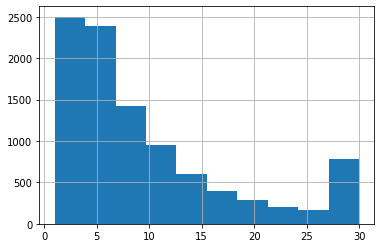

In [34]:
trn_predict["T=-1_cat"].hist()

In [0]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(trn_predict, test_size=0.3, random_state=42, stratify=trn_predict['T=-1_cat']) #split 함수에서 stratify 옵션을 사용하면 알아서 분포별로 나눠줌.

In [36]:
train_set

,KEDCode,FY,X7001110000,X7001110100,X7001110200,X7001110300,X7001152500,X7001160300,X7001111000,X7001121800,X7001127200,X7001131200,X7001132400,X7001140600,X7001143300,X7001144445,X7001144450,X7001144455,X7001144465,X7001145100,X7001145910,X7001165100,X7001165200,X7001165300,X7001171400,X7001173410,X7001173430,X7001174000,X7001176700,X7001220500,X7001220600,X7001220700,X7001220900,X7001221600,X7001222200,X7001222300,X7001222400,X7001222700,X7001222900,X7001223160,X7001223170,X7001223310,X7001223800,X7001225310,X7001227300,X7001228150,X7001228155,X7001228160,X7001243900,X7001244000,X7001244100,X7001254500,X7001254700,X7001255000,X7001255800,labor_Prod_O,T=-1_cat
2153,103021,20171231,15310580.0,5727960.0,5281887.0,228014.0,3492350.0,3492350.0,6522.0,9582620.0,8689226.0,112546.0,151757.0,108330.0,65776.0,11527384.0,3097309.0,893947.0,893947.0,189331.0,50241.0,3783196.0,530000.0,530000.0,3253196.0,3247196.0,220848.0,10048763.0,8414754.0,1634009.0,1140384.0,469888.0,469888.0,39432.0,27212.0,7501.0,4880.0,62731.0,52231.0,20917.0,36383.0,61932.0,30.0,155257.0,31700.0,493625.0,87082.0,43307.0,33412.0,307561.0,277638.0,273146.0,220848.0,220848.0,3247196.0,10969.444444,4.0
7573,7456185,20171231,4228315.0,1935558.0,806325.0,112654.0,646458.0,646458.0,44762.0,2292757.0,2178739.0,14541.0,241331.0,77981.0,35000.0,2617848.0,745755.0,317736.0,104835.0,43882.0,84194.0,1610467.0,1310000.0,1310000.0,300467.0,300467.0,121405.0,2767379.0,1880525.0,886854.0,701564.0,360493.0,360493.0,47081.0,13275.0,12761.0,3577.0,20464.0,27100.0,31353.0,7009.0,41342.0,943.0,9381.0,30198.0,185290.0,3661.0,301.0,3105.0,57287.0,56764.0,131664.0,121405.0,121405.0,300467.0,9752.105263,4.0
7410,7188495,20171231,706334.0,501585.0,475134.0,311572.0,149560.0,149560.0,13653.0,204749.0,168963.0,223495.0,6891.0,20001.0,20001.0,107398.0,71790.0,3291.0,3291.0,8360.0,26109.0,598936.0,150000.0,150000.0,449993.0,444993.0,6457.0,1787645.0,1195461.0,592184.0,575373.0,308909.0,308909.0,6205.0,7989.0,1862.0,33677.0,3234.0,38502.0,11831.0,17076.0,21449.0,257.0,49766.0,46700.0,16811.0,4781.0,68.0,4713.0,15135.0,3272.0,6457.0,6457.0,6457.0,444993.0,1867.888889,1.0
1750,88411,20171231,26877605.0,11128462.0,5771954.0,331345.0,4917115.0,4917115.0,2048.0,15749143.0,15268238.0,122563.0,481880.0,323062.0,784.0,11499160.0,6387471.0,3077364.0,3077364.0,774534.0,33862.0,15378445.0,400000.0,400000.0,14970757.0,14405157.0,1709818.0,34010595.0,21801060.0,12209535.0,10267650.0,2522403.0,2522403.0,203029.0,449735.0,44782.0,36077.0,59355.0,103143.0,64978.0,26629.0,3323995.0,892.0,101934.0,74873.0,1941885.0,523940.0,26185.0,140795.0,684474.0,51962.0,1781351.0,1709818.0,1709818.0,14405157.0,17815.458716,6.0
8267,7565042,20171231,2023673.0,1630079.0,1446748.0,159055.0,1276017.0,699282.0,7833.0,393594.0,349979.0,66533.0,1741.0,30000.0,30000.0,1418176.0,387691.0,235681.0,235681.0,6256.0,29969.0,605497.0,150000.0,150000.0,455497.0,455497.0,224059.0,4373189.0,3925954.0,447235.0,177013.0,82308.0,31868.0,6840.0,3470.0,1797.0,8163.0,1641.0,18880.0,6608.0,3917.0,11644.0,2537.0,7566.0,9603.0,270222.0,2551.0,37.0,1672.0,31836.0,31161.0,240937.0,224059.0,224059.0,455497.0,27022.200000,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7978,7521854,20171231,5447594.0,3159075.0,2230703.0,19976.0,885507.0,885507.0,22570.0,2288519.0,2257422.0,72631.0,19851.0,31097.0,31097.0,3672728.0,2182728.0,765985.0,765985.0,203067.0,29190.0,1774866.0,300000.0,300000.0,1474866.0,1474866.0,195508.0,3073429.0,2477537.0,595892.0,323694.0,27600.0,26600.0,27916.0,29659.0,3261.0,8692.0,5959.0,716.0,35032.0,11826.0,14154.0,143.0,118515.0,21513.0,272198.0,88237.0,75895.0,7404.0,109318.0,102353.0,251117.0,195508.0,195508.0,1474866.0,45366.333333,16.0
7521,7411898,20171231,1085188.0,895188.0,895188.0,475525.0,215209.0,79000.0,5162.0,190000.0,40752.0,97749.0,473

In [37]:
test_set

,KEDCode,FY,X7001110000,X7001110100,X7001110200,X7001110300,X7001152500,X7001160300,X7001111000,X7001121800,X7001127200,X7001131200,X7001132400,X7001140600,X7001143300,X7001144445,X7001144450,X7001144455,X7001144465,X7001145100,X7001145910,X7001165100,X7001165200,X7001165300,X7001171400,X7001173410,X7001173430,X7001174000,X7001176700,X7001220500,X7001220600,X7001220700,X7001220900,X7001221600,X7001222200,X7001222300,X7001222400,X7001222700,X7001222900,X7001223160,X7001223170,X7001223310,X7001223800,X7001225310,X7001227300,X7001228150,X7001228155,X7001228160,X7001243900,X7001244000,X7001244100,X7001254500,X7001254700,X7001255000,X7001255800,labor_Prod_O,T=-1_cat
7053,7131939,20171231,10865141.0,6670444.0,3516898.0,5656.0,2826578.0,55000.0,30299.0,4194697.0,3814010.0,198248.0,15130.0,129264.0,129264.0,6434949.0,3804118.0,2916469.0,2916469.0,203851.0,56655.0,4430192.0,500000.0,500000.0,3930192.0,3930192.0,921256.0,29682794.0,27177248.0,2505546.0,854587.0,222269.0,109104.0,40946.0,8035.0,8404.0,18971.0,29081.0,13200.0,44667.0,27726.0,91830.0,1738.0,15427.0,106166.0,1650959.0,23452.0,10780.0,11082.0,189023.0,100725.0,1485388.0,921256.0,921256.0,3930192.0,51592.468750,18.0
4856,909682,20171231,44745858.0,27088205.0,16441217.0,812943.0,14382427.0,14382427.0,40619.0,17657653.0,15602994.0,535389.0,1245693.0,1139501.0,11300.0,33461258.0,29506329.0,1856078.0,1856078.0,3629669.0,2072538.0,11284600.0,3000000.0,3000000.0,1641932.0,1641932.0,246537.0,48321915.0,41744498.0,6577417.0,6529053.0,2886778.0,2853251.0,481947.0,73024.0,19445.0,28464.0,52196.0,461618.0,120924.0,28636.0,472846.0,1751.0,205504.0,148814.0,48364.0,2680876.0,37343.0,2637279.0,2207034.0,832193.0,522206.0,246537.0,246537.0,1641932.0,265.736264,1.0
1043,54818,20171231,5883180.0,5112322.0,5110659.0,2159513.0,1771744.0,1771744.0,18538.0,770858.0,20511.0,12534.0,247497.0,516770.0,347513.0,1359715.0,1359715.0,574164.0,574164.0,60392.0,265359.0,4523465.0,700000.0,700000.0,3777265.0,3777265.0,998931.0,14581717.0,12502000.0,2079717.0,1040065.0,482634.0,273931.0,28592.0,29867.0,1377.0,4184.0,52460.0,29874.0,6428.0,10634.0,32822.0,7174.0,16792.0,84724.0,1039652.0,21386.0,8864.0,9365.0,62107.0,15352.0,998931.0,998931.0,998931.0,3777265.0,38505.629630,13.0
366,16721,20171231,1998608.0,1329540.0,1326351.0,57951.0,1117501.0,1117501.0,11601.0,669068.0,639180.0,55039.0,66342.0,23584.0,21295.0,725939.0,715839.0,87674.0,47720.0,12350.0,3407.0,1272669.0,100000.0,100000.0,1172669.0,1159216.0,314685.0,1646027.0,1363183.0,282844.0,185365.0,80295.0,80295.0,12261.0,3339.0,1973.0,2356.0,3942.0,9450.0,7684.0,2271.0,18611.0,100.0,6518.0,5736.0,97479.0,279551.0,1780.0,145.0,59988.0,54461.0,317042.0,314685.0,314685.0,1159216.0,19495.800000,7.0
8367,7582155,20171231,1806609.0,843059.0,818241.0,291132.0,490782.0,490782.0,1749.0,963550.0,51621.0,9980.0,6891.0,259445.0,259445.0,659402.0,659402.0,401263.0,401263.0,114733.0,61919.0,1147207.0,300000.0,300000.0,847207.0,847207.0,693626.0,8204187.0,5145032.0,3059155.0,2318805.0,328411.0,195786.0,60634.0,16838.0,1775.0,42086.0,10886.0,154200.0,3877.0,10581.0,174591.0,1809.0,40893.0,29328.0,740350.0,18761.0,601.0,2485.0,48069.0,3295.0,711042.0,693626.0,693626.0,847207.0,43550.000000,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,97013,20171231,9886919.0,661122.0,464708.0,224250.0,86530.0,86530.0,2484.0,9225797.0,9189097.0,106164.0,700.0,36700.0,13100.0,7972541.0,2797680.0,158846.0,158846.0,14564.0,36508.0,1914378.0,400000.0,400000.0,547798.0,547798.0,14952.0,2291772.0,1160119.0,1131653.0,918615.0,319350.0,319350.0,53962.0,2669.0,2298.0,6995.0,36490.0,13800.0,12353.0,5270.0,62453.0,253.0,132555.0,8402.0,213038.0,4517.0,426.0,4000.0,202603.0,197775.0,14952.0,14952.0,14952.0,547798.0,35506.333333,12.0
7498,7204779,20171231,5097345.0,2490489.0,2036530.0,65049.0,596354.0,59635

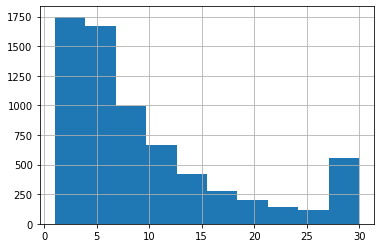

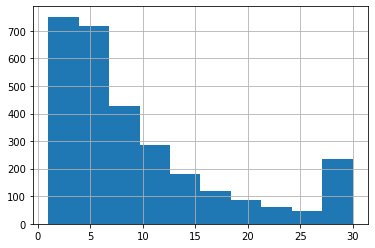

In [38]:
import matplotlib.pyplot as plt

plt.figure(1)
train_set["T=-1_cat"].hist(alpha=1)

plt.figure(2)
test_set["T=-1_cat"].hist(alpha=1)

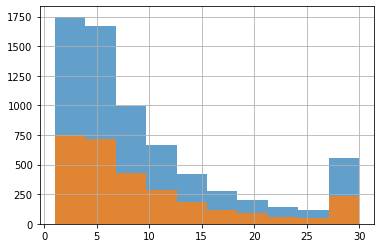

In [39]:
train_set["T=-1_cat"].hist(alpha=0.7)
test_set["T=-1_cat"].hist(alpha=0.8)

In [0]:
X_train = train_set.drop("labor_Prod_O", axis=1)
X_train = X_train.drop("KEDCode", axis=1)
X_train = X_train.drop("T=-1_cat", axis=1)  #X_train은 train set에서 시차변수들만을 남겨둠
y_train = train_set["labor_Prod_O"].values  #y_train은 train set에서 당일의 데이터만 남겨둠
X_test = test_set.drop("labor_Prod_O", axis=1)
X_test = X_test.drop("KEDCode", axis=1)
X_test = X_test.drop("T=-1_cat", axis=1) #x_test set은 test set에서 시차변수들만 남김
y_test = test_set["labor_Prod_O"].values #y_test set은 
X_forecast = trn_forecasting.drop("labor_Prod_O", axis=1)
X_forecast = X_forecast.drop("KEDCode", axis=1) #X_forecast는 forecast 하기 위해 떼어놓은 데이터셋에서 시차변수만 남김
y_forecast = trn_forecasting["labor_Prod_O"].values # y_forecast는 forecast하기 위해 떼어놓은 데이터셋에서 당일값만 남김

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_forecast_scaled = scaler.transform(X_forecast)

In [0]:
import tensorflow as tf

def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))   #data 길이에 대응되는 인덱스를 뽑아냄
    np.random.shuffle(idx) #그 인덱스를 랜덤하게 셔플함
    idx = idx[:num] #셔플된 인덱스를 우리가 원하는 배치 크기만큼만 뽑아냄
    data_shuffle = [data[ i] for i in idx] #뽑아낸 인덱스에 대응되는 데이터 값을 찾아냄
    labels_shuffle = [np.array(labels[ i]) for i in idx] #i에 idx 값을 넣으면서 그 idx에 해당하는 label 값을 뽑아냄 그걸 array로 바꿔줌

    return np.asarray(data_shuffle), np.asarray(labels_shuffle) #여러 array를 하나의 array로 변환
  

In [43]:

tf.compat.v1.reset_default_graph()

tf.compat.v1.set_random_seed(0)

sigma = 1
# weight_initializer = tf.keras.initializers.VarianceScaling(mode="fan_avg", distribution="uniform", scale=sigma)
weight_initializer = tf.keras.initializers.he_normal()
bias_initializer = tf.zeros_initializer()

accuracy_list = []

n_inputs = 54
n_hidden1 = 200
n_hidden2 = 100
n_hidden3 = 50
n_hidden4 = 25
n_outputs = 1

net = tf.compat.v1.InteractiveSession()

X = tf.compat.v1.placeholder(tf.float32, shape=[None, n_inputs], name="X")
y = tf.compat.v1.placeholder(tf.float32, shape=[None], name="y") 
drop_rate=tf.compat.v1.placeholder(tf.float32, name="drop_rate")
# is_training=tf.placeholder(tf.bool, name="is_training")
is_training=tf.compat.v1.placeholder_with_default(False, shape=(), name="is_training")
# drop_rate=0.3

# Layer 1: Variables for hidden weights and biases
W_hidden_1 = tf.Variable(weight_initializer([n_inputs, n_hidden1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_hidden1]))
# scale1=tf.Variable(tf.ones([n_hidden1]))
beta1 = tf.Variable(tf.constant(0.0, shape=[n_hidden1]), trainable=True)
gamma1 = tf.Variable(tf.constant(1.0, shape=[n_hidden1]), trainable=True)

# Layer 2: Variables for hidden weights and biases
W_hidden_2 = tf.Variable(weight_initializer([n_hidden1, n_hidden2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_hidden2]))
# scale2=tf.Variable(tf.ones([n_hidden2]))
beta2 = tf.Variable(tf.constant(0.0, shape=[n_hidden2]), trainable=True)
gamma2 = tf.Variable(tf.constant(1.0, shape=[n_hidden2]), trainable=True)


# Layer 3: Variables for hidden weights and biases
W_hidden_3 = tf.Variable(weight_initializer([n_hidden2, n_hidden3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_hidden3]))
# scale3=tf.Variable(tf.ones([n_hidden3]))
beta3 = tf.Variable(tf.constant(0.0, shape=[n_hidden3]), trainable=True)
gamma3 = tf.Variable(tf.constant(1.0, shape=[n_hidden3]), trainable=True)

# Layer 4: Variables for hidden weights and biases
W_hidden_4 = tf.Variable(weight_initializer([n_hidden3, n_hidden4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_hidden4]))
# scale4=tf.Variable(tf.ones([n_hidden4]))
beta4 = tf.Variable(tf.constant(0.0, shape=[n_hidden4]), trainable=True)
gamma4 = tf.Variable(tf.constant(1.0, shape=[n_hidden4]), trainable=True)

# Output layer: Variables for output weights and biases
W_out = tf.Variable(weight_initializer([n_hidden4, n_outputs]))
bias_out = tf.Variable(bias_initializer([n_outputs]))



Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
groups={'Loss':['Training_Error','Validation_Error']}
plotlosses=PlotLosses(groups=groups)

In [104]:
# tf.keras.backend.clear_session()

np.random.seed(0)

# tf.name_scope("dnn"):
      
_hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
BN1=tf.compat.v1.layers.batch_normalization(_hidden_1,training=is_training)
    # BN1=tf.compat.v1.layers.BatchNormalization(_hidden_1,trainable=is_training)
    # BN1=tf.keras.layers.BatchNormalization(momentum=0.9)(inputs=_hidden_1,training=is_training)
hidden_1 = tf.nn.dropout(BN1,rate=drop_rate)
    # hidden_1=tf.keras.layers.Dropout(rate=drop_rate, input_shape=(2,)) 

_hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
BN2=tf.compat.v1.layers.batch_normalization(_hidden_2,training=is_training)
    # BN2=tf.compat.v1.layers.BatchNormalization(_hidden_2,trainable=is_training)
    # BN2=tf.keras.layers.BatchNormalization(momentum=0.9)(_hidden_2,training=is_training)
hidden_2 = tf.nn.dropout(BN2,rate=drop_rate)
    # hidden_2=tf.keras.layers.Dropout(rate=drop_rate, input_shape=(2,))     
    
_hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
BN3=tf.compat.v1.layers.batch_normalization(_hidden_3,training=is_training)
    # BN3=tf.compat.v1.layers.BatchNormalization(_hidden_3,trainable=is_training)
    # BN3=tf.keras.layers.BatchNormalization(momentum=0.9)(_hidden_3,training=is_training)
hidden_3 = tf.nn.dropout(BN3,rate=drop_rate)
    # hidden_3=tf.keras.layers.Dropout(rate=drop_rate, input_shape=(2,)) 
    
_hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))
BN4=tf.compat.v1.layers.batch_normalization(_hidden_4,training=is_training)
    # BN4=tf.compat.v1.layers.BatchNormalization(_hidden_4,trainable=is_training)
    # BN4=tf.keras.layers.BatchNormalization(momentum=0.9)(_hidden_4,training=is_training)
hidden_4 = tf.nn.dropout(BN4,rate=drop_rate)
    # hidden_4=tf.keras.layers.Dropout(rate=drop_rate, input_shape=(2,)) 

y_result = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

   
# tf.name_scope("loss"):
loss = tf.reduce_mean(tf.math.squared_difference(y,y_result), name='loss')

# learning_rate = 0.5
threshold=1.0
n_epochs = 5
batch_size = 1000


update_ops = tf.compat.v1.get_collection(tf.compat.v1.GraphKeys.UPDATE_OPS, ) 
# tf.control_dependencies(update_ops):
learning_rate = 0.015
opt=tf.compat.v1.train.AdamOptimizer(learning_rate).minimize(loss)
opt=tf.group([opt,update_ops])
#     optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate)
#     gradients, variables = zip(*optimizer.compute_gradients(loss))
#     gradients, _ = tf.clip_by_global_norm(gradients, 0.15)
#     opt = optimizer.apply_gradients(zip(gradients, variables))
    

plt.figure(figsize=(15, 10))
net=tf.compat.v1.Session()  
init = tf.compat.v1.global_variables_initializer()
net.run(init)

for epoch in range(n_epochs):
  for iteration in range(len(X_train_scaled) // batch_size):
    X_batch, y_batch = next_batch(batch_size, X_train_scaled, y_train)
    net.run(opt, feed_dict={X:X_train_scaled, y: y_train, drop_rate: 0, is_training: True})
#       net.run([opt,update_ops], feed_dict={X: X_train_scaled, y: y_train, drop_rate: 0, is_training: True})
      # train_error = net.run(loss, feed_dict={X: X_train_scaled, y: y_train[,None], drop_rate: 0, is_training: False}) 이렇게 y에 feed 하게 되면 이상해짐 학습이 안됨
      
    train_error = net.run(loss, feed_dict={X: X_train_scaled, y: y_train, drop_rate: 0, is_training: False})
    validation_error = net.run(loss, feed_dict={X: X_test_scaled, y: y_test, drop_rate: 0, is_training: False})     #-----new------#
    accuracy_list.append(validation_error)
    plotlosses.update({'Training_Error': train_error,'Validation_Error':validation_error})
    plotlosses.send()

    if epoch%20==0:
      print(epoch, "Train MSE:", train_error, "Test MSE:", validation_error)
    if epoch >= 50:
            if abs(validation_error - np.mean(accuracy_list[-20:]))/validation_error*100 <= 0.00001 :
               print("Validation error is converged")
               break

background = X_train_scaled[np.random.choice(X_train_scaled.shape[0], 100, replace=False)]
e=shap.GradientExplainer((X,y_result),background,session=net)
e.shap_values(X_train_scaled,nsamples=200)
  
  # shap.DeepExplainer(model=([X,drop_rate, is_training], y_result),data=[background,0,False],session=net)
  
forecast_result = np.zeros(149)
for i in range(len(X_forecast_scaled)):
  forecast_result[i] = net.run(y_result, feed_dict={X: np.expand_dims(X_forecast_scaled[i], axis=0), drop_rate: 0, is_training: False})
  


TypeError: ignored

In [101]:
e=shap.GradientExplainer((X,y),background,session=net)

<tf.Tensor 'y:0' shape=(None,) dtype=float32>

In [0]:
shap.GradientExplainer?

In [0]:

plt.figure(figsize=(15, 10))
plt.plot(y_forecast)
plt.plot(forecast_result)

plt.legend(['real', 'predict'])
result_percentage=np.mean(abs(forecast_result-y_forecast)/y_forecast*100)
print("Forecasting Error is", round(result_percentage,2),"%")

In [0]:
!pip install shap
!pip install lime
!pip install eli5

In [0]:
 X_train_scaled[np.random.choice(X_train_scaled.shape[0], 100, replace=False)]

In [0]:
X_train[2]

In [0]:
shap.DeepExplainer?

In [109]:
IN=tf.compat.v1.get_default_graph().get_tensor_by_name?

Object `get_tensor_by_name` not found.


In [0]:
tf.compat.v1.get_default_graph?

In [0]:
seed(42)

K.clear_session()
model = Sequential()
model.add(Dense(units=1000, input_dim=5, kernel_initializer='he_normal', bias_initializer='he_normal', activation='elu', 
                kernel_regularizer=l1_l2(l1=0.01,l2=0.01), bias_regularizer=l1_l2(l1=0.01,l2=0.01)))
model.add(BatchNormalization(beta_initializer='he_normal',gamma_initializer='he_normal',moving_mean_initializer='he_normal', 
                             moving_variance_initializer='he_normal',beta_regularizer=l1_l2(l1=0.01,l2=0.01),
                             gamma_regularizer=l1_l2(l1=0.01,l2=0.01)))
model.add(Dropout(rate=0.3))
model.add(Dense(units=1, kernel_initializer='he_normal', bias_initializer='he_normal', activation='linear', 
                kernel_regularizer=l1_l2(l1=0.01,l2=0.01), bias_regularizer=l1_l2(l1=0.01,l2=0.01)))
# optimizer = SGD(lr=0.15, momentum=0.01, nesterov=True)
optimizer = Adam(lr=0.08, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='mean_absolute_percentage_error', optimizer=optimizer)
early_stop = EarlyStopping(monitor='val_loss',patience=30,verbose=1,restore_best_weights=True)
model.fit(X_train_scaled,y_train,epochs=1000,batch_size=50,verbose=1,validation_split=0.3,callbacks=[early_stop])
forecast_result=model.predict(X_forecast_scaled)